# Repetition Code Testing


In [7]:
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, Aer, assemble
from qiskit import execute, Aer, QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors import pauli_error, depolarizing_error
from qiskit.visualization import plot_histogram

# import matplotlib.pyplot as plt

# from qtcodes import RepetitionQubit

# from qiskit.providers.aer.noise import NoiseModel
# from qiskit.providers.aer.noise.errors import pauli_error, depolarizing_error
# from qiskit.visualization import plot_histogram


In [4]:

class RepQubit:
	def __init__(self, d = 3):
		self.qr = QuantumRegister(d, name='qr')
		self.c = ClassicalRegister(d, name='c')
		self.nqr = d
		self.nanc = d-1
		self.anc = QuantumRegister(d-1, name='anc')
		self.syn = ClassicalRegister(d-1, name='syn')
		self.circ = QuantumCircuit(self.qr, self.c, self.anc, self.syn)

	def draw(self):
		return self.circ.draw()

	def entangle(self):
		for i in range(1, self.nqr):
			self.circ.cx(self.qr[0], self.qr[i])
		self.circ.barrier()

	def stabilise(self):
		for i in range(self.nqr-1):
			self.circ.cx(self.qr[i],self.anc[i])
			self.circ.cx(self.qr[i+1],self.anc[i])
		self.circ.measure(self.anc, self.syn)

		self.circ.reset(self.anc)
		self.circ.barrier()
		# self.circ
		# print(self.syn.instances_c)

	def x(self):
		for i in range(0,self.nqr):
			self.circ.x(self.qr[i])
		self.circ.barrier()


In [10]:
def get_noise(p_meas, p_gate):
    error_meas = pauli_error([('X', p_meas), ('I', 1 - p_meas)])
    error_gate1 = depolarizing_error(p_gate, 1)
    error_gate2 = error_gate1.tensor(error_gate1)

    noise_model = NoiseModel()
    noise_model.add_all_qubit_quantum_error(error_meas, "measure")  # measurement error is applied to measurements
    noise_model.add_all_qubit_quantum_error(error_gate1, ["x"])  # single qubit gate error is applied to x gates
    noise_model.add_all_qubit_quantum_error(error_gate2, ["cx"])  # two qubit gate error is applied to cx gates

    return noise_model

In [59]:
nd = 5
qubit = RepQubit(nd)
# qubit.x()
qubit.stabilise()

qubit.circ.measure_all()

qubit.draw()

░  ░ ┌─┐                     »
  qr_0: ──■──────────────────────────────────────░──░─┤M├─────────────────────»
          │                                      ░  ░ └╥┘┌─┐                  »
  qr_1: ──┼────■────■────────────────────────────░──░──╫─┤M├──────────────────»
          │    │    │                            ░  ░  ║ └╥┘┌─┐               »
  qr_2: ──┼────┼────┼────■────■──────────────────░──░──╫──╫─┤M├───────────────»
          │    │    │    │    │                  ░  ░  ║  ║ └╥┘┌─┐            »
  qr_3: ──┼────┼────┼────┼────┼────■────■────────░──░──╫──╫──╫─┤M├────────────»
          │    │    │    │    │    │    │        ░  ░  ║  ║  ║ └╥┘┌─┐         »
  qr_4: ──┼────┼────┼────┼────┼────┼────┼────■───░──░──╫──╫──╫──╫─┤M├─────────»
        ┌─┴─┐┌─┴─┐  │    │    │    │    │    │   ░  ░  ║  ║  ║  ║ └╥┘┌─┐      »
 anc_0: ┤ X ├┤ X ├──┼────┼────┼────┼────┼────┼───░──░──╫──╫──╫──╫──╫─┤M├──────»
        └───┘└───┘┌─┴─┐┌─┴─┐  │    │    │    │   ░  ░  ║  ║  ║  ║  ║ └╥┘┌─┐   »
 anc_1: ──────────┤ X ├┤ X ├──┼────┼────┼────┼───░──░──╫──╫──╫──╫──╫──╫─┤M├───»
                  └───┘└───┘┌─┴─┐┌─┴─┐  │    │   ░  ░  ║  ║  ║  ║  ║  ║ └╥┘┌─┐»
 anc_2: ────────────────────┤ X ├┤ X ├──┼────┼───░──░──╫──╫──╫──╫──╫──╫──╫─┤M├»
                            └───┘└───┘┌─┴─┐┌─┴─┐ ░  ░  ║  ║  ║  ║  ║  ║  ║ └╥┘»
 anc_3: ──────────────────────────────┤ X ├┤ X ├─░──░──╫──╫──╫──╫──╫──╫──╫──╫─»
                                      └───┘└───┘ ░  ░  ║  ║  ║  ║  ║  ║  ║  ║ »
   c: 5/═══════════════════════════════════════════════╬══╬══╬══╬══╬══╬══╬══╬═»
                                                       ║  ║  ║  ║  ║  ║  ║  ║ »
 syn: 4/═══════════════════════════════════════════════╬══╬══╬══╬══╬══╬══╬══╬═»
                                                       ║  ║  ║  ║  ║  ║  ║  ║ »
meas: 9/═══════════════════════════════════════════════╩══╩══╩══╩══╩══╩══╩══╩═»
                                                       0  1  2  3  4  5  6  7 »
«           
«  qr_0: ───
«           
«  qr_1: ───
«           
«  qr_2: ───
«           
«  qr_3: ───
«           
«  qr_4: ───
«           
« anc_0: ───
«           
« anc_1: ───
«           
« anc_2: ───
«        ┌─┐
« anc_3: ┤M├
«        └╥┘
«   c: 5/═╬═
«         ║ 
« syn: 4/═╬═
«         ║ 
«meas: 9/═╩═
«         8

In [21]:
from pymatching import Matching
import numpy as np

class RepDecoder:
    def __init__(self, d = 3):
        hzl = []
        for i in range(d-1):
            row = [0]*d; row[i] = 1; row[i+1] = 1
            hzl.append(row)
        self.Hz = np.array(hzl)
        # print(self.Hz)
        self.d = d
        self.match = Matching(self.Hz)
        # self.match.draw()

    def correctreadout(self, repbits, anc):
        syn = np.array(list(map(int, [*anc])))
        # print(syn)
        c = self.match.decode(syn)
        readout = list(map(int, [*repbits]))
        # print(c)
        for i, v in enumerate(c):
            if v==1:
                # pass
                readout[i] = 1-readout[i]
        return readout

    def getlogbit(self, readout):
        numofbit = [0, 0]
        for bit in readout:
            numofbit[bit] += 1
        if numofbit[0] > numofbit[1]:
            return 0
        else:
            return 1
    
    

In [70]:
numshots = 10000
perror = 0.0
counts = execute(qubit.circ, Aer.get_backend('qasm_simulator'), noise_model=get_noise(0.1,0.1), shots=numshots).result().get_counts()
decoder = RepDecoder(qubit.nqr)
for bitstr in counts:
    d = qubit.nqr
    meas = bitstr.split()[0]
    repbits = meas[:d]
    ancbits = meas[d:]
    res = decoder.correctreadout(repbits, ancbits)
    outbit = decoder.getlogbit(res)
    # print(bitstr, counts[bitstr])
    # print(res)
    # print(outbit)
    if outbit!=0:
        perror += counts[bitstr] / numshots
# print(counts)
print(perror)

0.14210000000000003


In [12]:
def testrep(d, p_meas, p_gate):
    # d = 5
    qubit = RepQubit(d)
    # qubit.x()
    qubit.stabilise()
    qubit.circ.measure_all()
    # print(qubit.draw())
    numshots = 10000

    perror = 0.0
    counts = execute(qubit.circ, Aer.get_backend('qasm_simulator'), noise_model=get_noise(p_meas, p_gate), shots=numshots).result().get_counts()
    # print(counts)
    decoder = RepDecoder(qubit.nqr)
    for bitstr in counts:
        d = qubit.nqr
        meas = bitstr.split()[0]
        repbits = meas[:d]
        ancbits = meas[d:]
        # res = decoder.correctreadout(repbits, ancbits)
        # outbit = decoder.getlogbit(res)
        outbit = decoder.getlogbit(list(map(int, [*repbits])))
        # print(bitstr, counts[bitstr])
        # print(res)
        # print(outbit)
        # print(bitstr, counts[bitstr])
        # print(res)
        if outbit!=0:
            perror += counts[bitstr] / numshots
    # print(counts)
    print(perror)
    return perror

testrep(5, 0.05, 0.05)

0.0012000000000000003


0.0012000000000000003

In [140]:
# testrep(3, 0.1)
xvals = [0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.15, 0.2]
yvals = []
for x in xvals:
    yvals.append(testrep(3, x))
plt.plot(xvals, yvals)
xt = np.arange(0, 0.2, 0.02)
plt.plot(xt, xt, color ='tab:orange')
plt.show()

TypeError: testrep() missing 1 required positional argument: 'p_gate'

0.09190000000000001
0.04090000000000008
0.01919999999999994
0.0078000000000000074
0.004499999999999999


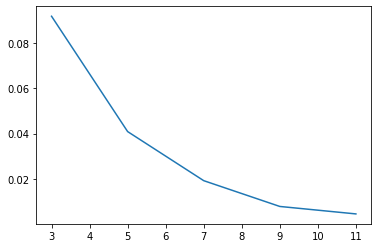

In [147]:
xv = range(3, 12, 2)
yv = []
from math import pi
for x in xv:
    yv.append(testrep(x,pi/20, pi/10))
plt.plot(xv, yv)
# plt.plot(xv, [pi/10]*len(yv))


In [15]:
def testrepwithdecode(d, p_meas, p_gate):
    # d = 5
    qubit = RepQubit(d)
    # qubit.x()
    qubit.stabilise()
    qubit.circ.measure_all()
    # print(qubit.draw())
    numshots = 10000

    perror = 0.0
    counts = execute(qubit.circ, Aer.get_backend('qasm_simulator'), noise_model=get_noise(p_meas, p_gate), shots=numshots).result().get_counts()
    decoder = RepDecoder(qubit.nqr)
    cnts = []
    for bitstr in counts:
        d = qubit.nqr
        meas = bitstr.split()[0]
        repbits = meas[:d]
        ancbits = meas[d:]
        # ancbits = bitstr.split()[1]
        res = decoder.correctreadout(repbits, ancbits)
        outbit = decoder.getlogbit(res)
        # outbit = decoder.getlogbit(list(map(int, [*repbits])))
        # print(bitstr, counts[bitstr])
        # print(res)
        # print(outbit)
        # print(bitstr, counts[bitstr])
        # print(res)
        # cnts.append((counts[bitstr], res, bitstr))
        if outbit!=0:
            perror += counts[bitstr] / numshots
    # print(counts)
    # for x in reversed(sorted(cnts)):
    #     print(x)
    print(perror)
    return perror

In [165]:
testrepwithdecode(3, 0, pi/10)

0.14010000000000006


0.14010000000000006

0.1991
0.20109999999999922
0.20309999999999542
0.20309999999999415
0.1980999999999945


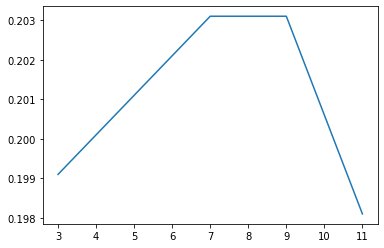

In [16]:
xv = range(3, 12, 2)
yv = []
from math import pi
for x in xv:
    yv.append(testrepwithdecode(x, pi/20, pi/10))
plt.plot(xv, yv)

In [23]:
def testrep(d, p_meas, p_gate):
    # d = 5
    qubit = RepQubit(d)
    # qubit.x()
    qubit.stabilise()
    qubit.circ.measure_all()
    # print(qubit.draw())
    numshots = 10000

    perror = 0.0
    counts = execute(qubit.circ, Aer.get_backend('qasm_simulator'), noise_model=get_noise(p_meas, p_gate), shots=numshots).result().get_counts()
    # print(counts)
    decoder = RepDecoder(qubit.nqr)
    for bitstr in counts:
        d = qubit.nqr
        meas = bitstr.split()[0]
        repbits = meas[:d]
        ancbits = meas[d:]
        res = decoder.correctreadout(repbits, ancbits)
        # outbit = decoder.getlogbit(res)
        # res = list(map(int, [*repbits]))
        outbit = decoder.getlogbit(res)
        # print(bitstr, counts[bitstr])
        # print(res)
        # print(outbit)
        # print(bitstr, counts[bitstr])
        # print(res)
        if outbit!=0:
            perror += counts[bitstr] / numshots
    # print(counts)
    print(perror)
    return perror

testrep(5, 0.05, 0.05)

0.023499999999999993


0.023499999999999993

0.025999999999999992
0.026999999999999996
0.025099999999999976
0.02619999999999996
0.03579999999999997
0.03429999999999997


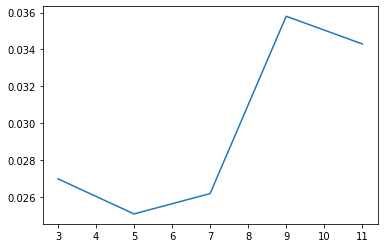

In [25]:
def testrep_test(d, p_meas, p_gate):
    # d = 5
    qubit = RepQubit(d)
    # qubit.x()
    qubit.stabilise()
    qubit.circ.measure_all()
    # print(qubit.draw())
    numshots = 10000

    perror = 0.0
    counts = execute(qubit.circ, Aer.get_backend('qasm_simulator'), noise_model=get_noise(p_meas, p_gate), shots=numshots).result().get_counts()
    # print(counts)
    decoder = RepDecoder(qubit.nqr)
    for bitstr in counts:
        d = qubit.nqr
        meas = bitstr.split()[0]
        repbits = meas[:d]
        ancbits = meas[d:]
        res = decoder.correctreadout(repbits, ancbits)
        # outbit = decoder.getlogbit(res)
        # res = list(map(int, [*repbits]))
        outbit = decoder.getlogbit(res)
        # print(bitstr, counts[bitstr])
        # print(res)
        # print(outbit)
        # print(bitstr, counts[bitstr])
        # print(res)
        if outbit!=0:
            perror += counts[bitstr] / numshots
    # print(counts)
    print(perror)
    return perror

testrep_test(5, 0.05, 0.05)
xv = range(3, 12, 2)
yv = []
from math import pi
for x in xv:
    yv.append(testrep_test(x, 0.05, 0.05))
plt.plot(xv, yv)
plt.show()